In [274]:
import pandas as pd
import numpy as np

In [275]:
## Data Ingestions step
df=pd.read_csv('data/finalTrain.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [276]:
df=df.drop(labels=["ID"],axis=1)


In [277]:
## Independent and dependent features
X = df.drop(labels=["Time_taken (min)"],axis=1)
Y = df[["Time_taken (min)"]]

In [278]:
Y

,Time_taken (min)
0,46
1,23
2,21
3,20
4,41
...,...
45579,32
45580,36
45581,16
45582,26


In [279]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(exclude="object").columns
print(categorical_cols)
print(numerical_cols)

Index(['Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')
Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries'],
      dtype='object')


In [280]:
#categorical columns
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
cat_imputer = cat_imputer.fit(X[categorical_cols])
X[categorical_cols] = cat_imputer.transform(X[categorical_cols])

#numerical columns
num_imputer = SimpleImputer(strategy='median', missing_values=np.nan)
num_imputer = num_imputer.fit(X[numerical_cols])
X[numerical_cols] = num_imputer.transform(X[numerical_cols])


In [281]:
## Extract day,month and year from the string Not extracting year as it's 2022 for all datapoints
X["Date"]=X['Order_Date'].apply(lambda x:x.split("-")[0]).astype(int)
X["Month"]=X['Order_Date'].apply(lambda x:x.split("-")[1]).astype(int)
X=X.drop(labels=['Order_Date'],axis=1)
X['Ordered_Hour']=X['Time_Orderd'].str.split(':').str[0].astype(float)
X['Ordered_Min']=X['Time_Orderd'].str.split(':').str[1].astype(float)
X.drop('Time_Orderd',axis=1,inplace=True)
X['Order_pick_Hour']=X['Time_Order_picked'].str.split(':').str[0].astype(float)
X['Order_pick_Min']=X['Time_Order_picked'].str.split(':').str[1].astype(float)
X.drop('Time_Order_picked',axis=1,inplace=True)
X["Ordered_Hour"] = X["Ordered_Hour"].astype(int)
X["Order_pick_Hour"] = X["Order_pick_Hour"].astype(int)
X.head()





,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,...,Type_of_vehicle,multiple_deliveries,Festival,City,Date,Month,Ordered_Hour,Ordered_Min,Order_pick_Hour,Order_pick_Min
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2.0,...,motorcycle,3.0,No,Metropolitian,12,2,21,55.0,22,10.0
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1.0,...,motorcycle,1.0,No,Metropolitian,13,2,14,55.0,15,5.0
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1.0,...,scooter,1.0,No,Metropolitian,4,3,17,30.0,17,40.0
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0.0,...,motorcycle,0.0,No,Metropolitian,13,2,9,20.0,9,30.0
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1.0,...,scooter,1.0,No,Metropolitian,14,2,19,50.0,20,5.0


In [282]:
X["Ordered_Min"] = X["Ordered_Min"].fillna(X["Ordered_Min"].median())
X["Order_pick_Min"] = X["Order_pick_Min"].fillna(X["Order_pick_Min"].median())
X.isnull().sum()


Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Date                           0
Month                          0
Ordered_Hour                   0
Ordered_Min                    0
Order_pick_Hour                0
Order_pick_Min                 0
dtype: int64

In [283]:
def replace_deliveryperson_with_mean(X):
    mean_time = df.groupby('Delivery_person_ID')['Time_taken (min)'].mean().sort_values()
    X['Delivery_person_ID'] = X['Delivery_person_ID'].apply(lambda x: mean_time[x])
    return X

X = replace_deliveryperson_with_mean(X)
X.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,...,Type_of_vehicle,multiple_deliveries,Festival,City,Date,Month,Ordered_Hour,Ordered_Min,Order_pick_Hour,Order_pick_Min
0,19.750000,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2.0,...,motorcycle,3.0,No,Metropolitian,12,2,21,55.0,22,10.0
1,29.384615,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1.0,...,motorcycle,1.0,No,Metropolitian,13,2,14,55.0,15,5.0
2,26.564103,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1.0,...,scooter,1.0,No,Metropolitian,4,3,17,30.0,17,40.0
3,22.466667,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0.0,...,motorcycle,0.0,No,Metropolitian,13,2,9,20.0,9,30.0
4,23.538462,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1.0,...,scooter,1.0,No,Metropolitian,14,2,19,50.0,20,5.0


In [284]:
#working on latitude and longitude columns for both restaurant location and delivery location
from sklearn.cluster import KMeans
#Restaurant location cluster
clus = df.loc[:,["Restaurant_latitude","Restaurant_longitude"]]
clus
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(clus[clus.columns])
X['Restaurant_cluster_label'] = kmeans.predict(clus[clus.columns])
X.head()

c:\Users\72424\Desktop\fsds2.0task\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,...,multiple_deliveries,Festival,City,Date,Month,Ordered_Hour,Ordered_Min,Order_pick_Hour,Order_pick_Min,Restaurant_cluster_label
0,19.750000,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2.0,...,3.0,No,Metropolitian,12,2,21,55.0,22,10.0,0
1,29.384615,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1.0,...,1.0,No,Metropolitian,13,2,14,55.0,15,5.0,2
2,26.564103,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1.0,...,1.0,No,Metropolitian,4,3,17,30.0,17,40.0,0
3,22.466667,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0.0,...,0.0,No,Metropolitian,13,2,9,20.0,9,30.0,0
4,23.538462,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1.0,...,1.0,No,Metropolitian,14,2,19,50.0,20,5.0,0


In [285]:
X.drop(labels=["Restaurant_latitude","Restaurant_longitude"],axis=1,inplace=True)
X.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Date,Month,Ordered_Hour,Ordered_Min,Order_pick_Hour,Order_pick_Min,Restaurant_cluster_label
0,19.750000,36.0,4.2,30.397968,78.116106,Fog,Jam,2.0,Snack,motorcycle,3.0,No,Metropolitian,12,2,21,55.0,22,10.0,0
1,29.384615,21.0,4.7,10.043064,76.347589,Stormy,High,1.0,Meal,motorcycle,1.0,No,Metropolitian,13,2,14,55.0,15,5.0,2
2,26.564103,23.0,4.7,18.652450,74.006619,Sandstorms,Medium,1.0,Drinks,scooter,1.0,No,Metropolitian,4,3,17,30.0,17,40.0,0
3,22.466667,34.0,4.3,30.919584,75.829346,Sandstorms,Low,0.0,Buffet,motorcycle,0.0,No,Metropolitian,13,2,9,20.0,9,30.0,0
4,23.538462,24.0,4.7,26.593504,80.502929,Fog,Jam,1.0,Snack,scooter,1.0,No,Metropolitian,14,2,19,50.0,20,5.0,0


In [286]:
d_clus = df.loc[:,["Delivery_location_latitude","Delivery_location_longitude"]]
d_clus
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(d_clus[d_clus.columns])
X['Delivery_cluster_label'] = kmeans.predict(d_clus[d_clus.columns])
X.drop(labels=["Delivery_location_latitude","Delivery_location_longitude"],axis=1,inplace=True)
X.head()

c:\Users\72424\Desktop\fsds2.0task\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Date,Month,Ordered_Hour,Ordered_Min,Order_pick_Hour,Order_pick_Min,Restaurant_cluster_label,Delivery_cluster_label
0,19.750000,36.0,4.2,Fog,Jam,2.0,Snack,motorcycle,3.0,No,Metropolitian,12,2,21,55.0,22,10.0,0,0
1,29.384615,21.0,4.7,Stormy,High,1.0,Meal,motorcycle,1.0,No,Metropolitian,13,2,14,55.0,15,5.0,2,2
2,26.564103,23.0,4.7,Sandstorms,Medium,1.0,Drinks,scooter,1.0,No,Metropolitian,4,3,17,30.0,17,40.0,0,3
3,22.466667,34.0,4.3,Sandstorms,Low,0.0,Buffet,motorcycle,0.0,No,Metropolitian,13,2,9,20.0,9,30.0,0,0
4,23.538462,24.0,4.7,Fog,Jam,1.0,Snack,scooter,1.0,No,Metropolitian,14,2,19,50.0,20,5.0,0,0


In [287]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(exclude="object").columns
print(categorical_cols)
print(numerical_cols)

Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')
Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Vehicle_condition', 'multiple_deliveries', 'Date', 'Month',
       'Ordered_Hour', 'Ordered_Min', 'Order_pick_Hour', 'Order_pick_Min',
       'Restaurant_cluster_label', 'Delivery_cluster_label'],
      dtype='object')


<Axes: >

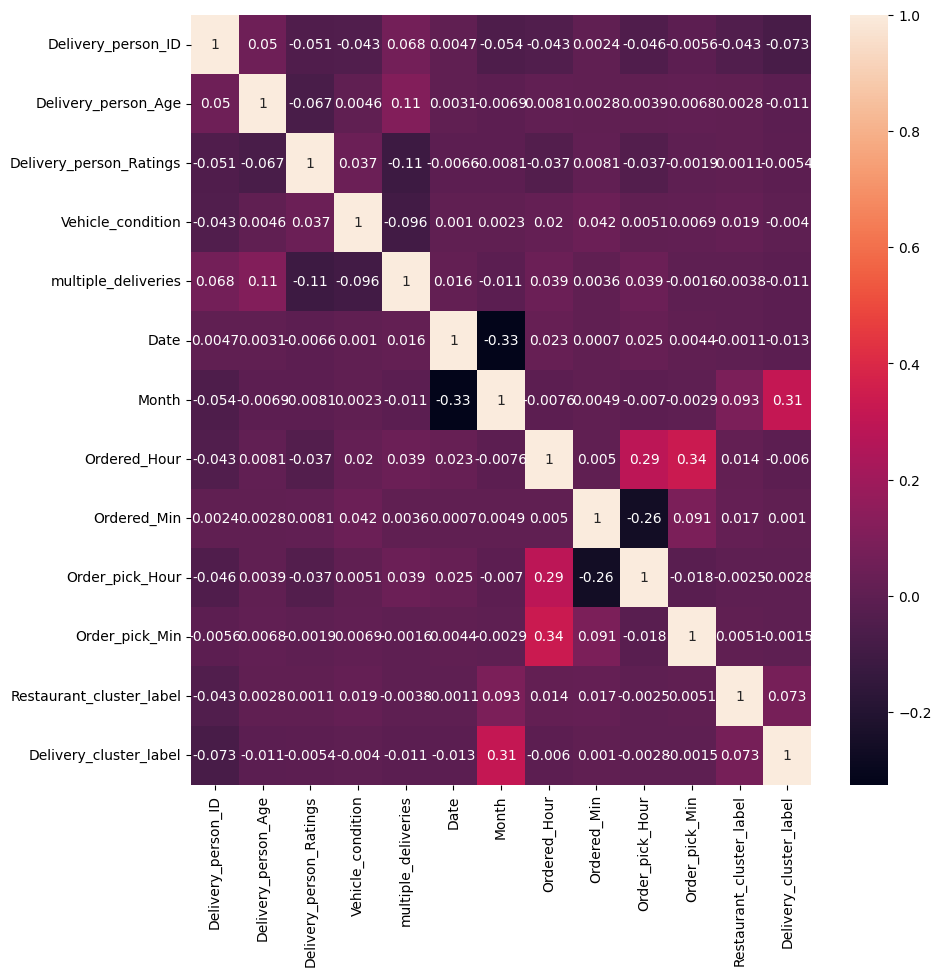

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(X[numerical_cols].corr(),annot=True)


In [291]:
# We see that the features are not correlated hence using all the numerical columns

In [292]:
# Define the custom ranking for each ordinal variable
weather_map={"Sandstorms":6,"Stormy":5,"Fog":4,"Windy":3,"Cloudy":2,"Sunny":1}
traffic_map={"Jam":4,"High":3,"Medium":2,"Low":1}
order_map={"Meal":4,"Buffet":3,"Snack":2,"Drinks":1}
vehicle_map={"motorcycle":1,"scooter":2,"electric_scooter":3,"bicycle":4}
festival_map={"No":1,"Yes":2}
city_map={"Metropolitian":3,"Urban":2,"Semi-Urban":1}


In [293]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(exclude="object").columns
print(categorical_cols)
print(numerical_cols)

Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')
Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Vehicle_condition', 'multiple_deliveries', 'Date', 'Month',
       'Ordered_Hour', 'Ordered_Min', 'Order_pick_Hour', 'Order_pick_Min',
       'Restaurant_cluster_label', 'Delivery_cluster_label'],
      dtype='object')


In [294]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder # Handling Feature Scaling
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
ord_transformer = OrdinalEncoder()
preprocessor = ColumnTransformer(
    [
        ("Ordinalencoder", ord_transformer, categorical_cols),
        ("StandardScaler", numeric_transformer, numerical_cols)       
    ]
)

In [295]:
## Train test split
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape

((31908, 19), (13676, 19))

In [296]:
X_train = preprocessor.fit_transform(X_train)


In [297]:
X_train = pd.DataFrame(X_train,columns=['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Date', 'Month', 'Ordered_Hour', 'Ordered_Min',
       'Order_pick_Hour', 'Order_pick_Min', 'Restaurant_cluster_label',
       'Delivery_cluster_label'])


In [298]:
X_train.isnull().sum()

Delivery_person_ID          0
Delivery_person_Age         0
Delivery_person_Ratings     0
Weather_conditions          0
Road_traffic_density        0
Vehicle_condition           0
Type_of_order               0
Type_of_vehicle             0
multiple_deliveries         0
Festival                    0
City                        0
Date                        0
Month                       0
Ordered_Hour                0
Ordered_Min                 0
Order_pick_Hour             0
Order_pick_Min              0
Restaurant_cluster_label    0
Delivery_cluster_label      0
dtype: int64

In [299]:
X_test = preprocessor.transform(X_test)

In [300]:
X_test = pd.DataFrame(X_test,columns=['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Date', 'Month', 'Ordered_Hour', 'Ordered_Min',
       'Order_pick_Hour', 'Order_pick_Min', 'Restaurant_cluster_label',
       'Delivery_cluster_label'])

In [301]:
## Model Training

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [302]:
regression=LinearRegression()
regression.fit(X_train,y_train)


LinearRegression()

In [303]:
regression.coef_

array([[-8.63318592e-01, -1.37537627e+00,  3.16948563e-02,
        -5.20955536e-01,  1.23847802e+01, -1.24326832e+00,
         9.09120881e-01,  2.09093293e+00, -2.33020990e+00,
        -1.71369627e+00,  2.23797241e+00,  1.09550555e-01,
         2.10613027e-02,  7.18309920e-01,  1.99904925e-01,
         6.69796943e-01, -2.22082151e-01, -8.33340144e-03,
         4.46318648e-03]])

In [304]:
regression.intercept_


array([32.24643847])

In [305]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [306]:
## Train multiple models

models = {
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "Elasticnet":ElasticNet()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    # make predictions
    y_pred=model.predict(X_test)

    evaluate_model(y_test,y_pred)

    mae, mse, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Training Performance")
    print("RMSE:",rmse)
    print("MAE",mae)
    print("MSE",mse)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 6.99998625126919
MAE 5.619899635188079
MSE 48.99980751795769
R2 score 45.1484218391063


Lasso
Model Training Performance
RMSE: 7.735002255780288
MAE 6.237606434571098
MSE 59.83025989692615
R2 score 33.02454961848363


Ridge
Model Training Performance
RMSE: 6.999983286169422
MAE 5.619916706360593
MSE 48.99976600665126
R2 score 45.148468307873934


Elasticnet
Model Training Performance
RMSE: 7.69417087078415
MAE 6.2304498538120425
MSE 59.20026538882333
R2 score 33.72978081739132




<bound method DataFrame.corr of        Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings   
0               19.750000                 36.0                      4.2  \
1               29.384615                 21.0                      4.7   
2               26.564103                 23.0                      4.7   
3               22.466667                 34.0                      4.3   
4               23.538462                 24.0                      4.7   
...                   ...                  ...                      ...   
45579           26.066667                 30.0                      4.8   
45580           27.769231                 21.0                      4.6   
45581           24.295455                 30.0                      4.9   
45582           27.112903                 20.0                      4.7   
45583           26.704918                 23.0                      4.9   

      Weather_conditions Road_traffic_density  Vehicle_condition   